PYTN-KS16-KELOMPOK 4

* Andhar Siraj Munir
* M. Rizqi Yuwanto
* M. Sadam Abdillah



# 1. PERKENALAN

## 1.1. Latar Belakang

Cuaca memainkan peran yang sangat penting dalam kehidupan manusia. Berbagai aktivitas sehari-hari manusia sangat tergantung pada kondisi cuaca. Oleh karena itu, prakiraan cuaca menjadi sangat penting bagi manusia agar dapat merencanakan aktivitas mereka dengan baik. Beberapa faktor alam yang dapat mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, dan kecepatan angin. Di antara fenomena cuaca yang sangat memengaruhi kehidupan manusia adalah hujan. Oleh karena itu, diperlukan suatu analisis dan model yang dapat memprediksi kemungkinan terjadinya hujan agar manusia dapat mengatur aktivitas mereka secara lebih efektif.

## 1.2. Dataset

Dataset yang digunakan adalah dataset yang berjudul [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) yang berasal diambil dari website kaggle Rain in Australia

Dataset ini berisi tentang histori cuaca harian selama 10 tahun dari berbagai lokasi di Australia yang terdiri dari 145460 baris dan 23 atribut.

RainTommorow akan menjadi target variable yang akan diprediksi. Itu berarti apakah besok akan hujan, Ya atau Tidak? Kolom ini akan berisikan Ya apabila hujan di hari itu lebih dari atau sama dengan 1mm

## 1.3. Objektif Yang Ingin Dicapai

Objektif yang ingin dicapai melalui analisis yang dilakukan ini adalah :

Mengetahui faktor-faktor apa saja yang mempengaruhi cuaca di kemudian hari
Memprediksi apakah akan terjadi hujan di suatu tempat berdasarkan faktor-faktor yang mempengaruhi dengan menggunakan motode Logistic Regression dan SVM(Support Vector Machine)

# 2. IMPORT LIBRARY

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

## 3.1 Load Data

In [2]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1-FANjYE05Zi04WoiBNvPsPmAgUV-4Dd2

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-FANjYE05Zi04WoiBNvPsPmAgUV-4Dd2
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 29.5MB/s]


In [3]:
# Read Dataset
data = pd.read_csv('weatherAUS.csv')
# Menampilkan Dataset
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## 3.2 Split Data

In [4]:
# split fitur target yaitu raintomorrow
data_feat = data.drop(['RainTomorrow'], axis=1)
data_target = data['RainTomorrow']

print(data_feat.head(2))
print(data_target.head(2))

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0           W           44.0          W  ...         24.0         71.0   
1         WNW           44.0        NNW  ...         22.0         44.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   

   Temp3pm  RainToday  
0     21.8         No  
1     24.3         No  

[2 rows x 22 columns]
0    No
1    No
Name: RainTomorrow, dtype: object


In [5]:
# test_size = 0.30 artinya data testing 30% dan data training 70%
# random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(data_feat, data_target, test_size = 0.3, random_state = 42)

In [6]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (101822, 22)
Dimensi target data train : (101822,)
Dimensi feature data test : (43638, 22)
Dimensi target data test : (43638,)


# 4. Eksplorasi Data Analisis

## 4.1 Informasi Data

In [7]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

Menampilkan 5 data teratas

In [8]:
df_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
141565,2015-06-18,Darwin,22.2,34.2,0.0,4.8,11.1,E,48.0,SE,...,66.0,27.0,1013.3,1009.4,1.0,1.0,25.7,33.4,No,No
85325,2012-03-10,Brisbane,16.9,31.4,0.0,4.6,11.5,E,20.0,WSW,...,50.0,50.0,1013.3,1011.4,1.0,2.0,24.7,29.4,No,No
17847,2016-09-30,Newcastle,8.8,20.9,2.4,NaN,NaN,NaN,NaN,N,...,39.0,NaN,NaN,NaN,6.0,NaN,17.0,NaN,Yes,No
69746,2015-09-18,Melbourne,NaN,NaN,NaN,2.0,1.3,SE,28.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98356,2014-04-26,Adelaide,11.8,21.3,1.2,NaN,9.1,S,35.0,SSW,...,75.0,60.0,1016.1,1017.1,NaN,NaN,18.2,19.3,Yes,No


Menampilkan 5 data terakhir

In [9]:
df_train.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
110268,2013-10-22,Albany,10.0,17.2,0.0,9.6,8.8,NaN,NaN,SW,...,58.0,58.0,1027.2,1025.7,7.0,1.0,13.8,16.0,No,No
119879,2015-05-29,PerthAirport,7.7,21.1,0.0,1.4,8.9,E,35.0,NE,...,69.0,43.0,1026.7,1023.0,1.0,1.0,12.3,20.1,No,No
103694,2012-03-17,Nuriootpa,7.6,21.7,0.0,6.0,11.2,SE,39.0,NE,...,85.0,42.0,1021.1,1019.6,2.0,2.0,13.7,21.2,No,No
131932,2014-06-23,Hobart,8.8,14.8,0.0,1.2,2.0,NNE,56.0,N,...,56.0,62.0,998.7,990.9,3.0,7.0,14.1,13.6,No,No
121958,2012-03-12,Perth,15.8,40.6,0.0,9.2,11.3,WSW,31.0,NE,...,28.0,28.0,1008.0,1005.1,2.0,2.0,30.1,33.9,No,No


Menampilkan dimensi dataset

In [10]:
df_train.shape

(101822, 23)

Terdapat 101822 baris dan 23 kolom pada dataset.

Menampilkan informasi detail

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101822 entries, 141565 to 121958
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           101822 non-null  object 
 1   Location       101822 non-null  object 
 2   MinTemp        100797 non-null  float64
 3   MaxTemp        100959 non-null  float64
 4   Rainfall       99540 non-null   float64
 5   Evaporation    57867 non-null   float64
 6   Sunshine       52902 non-null   float64
 7   WindGustDir    94636 non-null   object 
 8   WindGustSpeed  94677 non-null   float64
 9   WindDir9am     94426 non-null   object 
 10  WindDir3pm     98858 non-null   object 
 11  WindSpeed9am   100585 non-null  float64
 12  WindSpeed3pm   99684 non-null   float64
 13  Humidity9am    99946 non-null   float64
 14  Humidity3pm    98643 non-null   float64
 15  Pressure9am    91272 non-null   float64
 16  Pressure3pm    91286 non-null   float64
 17  Cloud9am       62689 non

Dari informasi diatas terdapat 16 type data float, dan 7 type data object.

Menampilkan nama-nama kolom pada dataset

In [12]:
df_train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Menampilkan ringkasan statistik dari kolom data numerik

In [13]:
df_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,100797.000000,100959.000000,99540.000000,57867.000000,52902.000000,94677.000000,100585.000000,99684.000000,99946.000000,98643.000000,91272.000000,91286.000000,62689.000000,60274.000000,100582.000000,99283.000000
mean,12.190511,23.215941,2.374911,5.459447,7.600316,40.052473,14.050186,18.658471,68.919927,51.536865,1017.643058,1015.249577,4.451084,4.507615,16.985651,21.682690
std,6.401221,7.116409,8.501302,4.189284,3.784919,13.659961,8.923893,8.821743,19.002757,20.760302,7.129409,7.060100,2.889409,2.720223,6.487717,6.935705
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,31.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,8.000000,9.000000,40.200000,46.700000


Menampilkan ringkasan statistik dari kolom data kategorikal

In [14]:
df_train.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,101822,101822,94636,94426,98858,99540,99553
unique,3396,49,16,16,16,2,2
top,2015-02-28,Canberra,W,N,SE,No,No
freq,44,2453,6999,8238,7597,77214,77327


Menampilkan nilai unik setiap kolom

In [15]:
df_train.nunique()

Date             3396
Location           49
MinTemp           381
MaxTemp           496
Rainfall          622
Evaporation       328
Sunshine          144
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       42
Humidity9am       101
Humidity3pm       101
Pressure9am       538
Pressure3pm       536
Cloud9am            9
Cloud3pm           10
Temp9am           430
Temp3pm           494
RainToday           2
RainTomorrow        2
dtype: int64

Menampilkan missing value pada dataset

In [16]:
df_train.isnull().sum()

Date                 0
Location             0
MinTemp           1025
MaxTemp            863
Rainfall          2282
Evaporation      43955
Sunshine         48920
WindGustDir       7186
WindGustSpeed     7145
WindDir9am        7396
WindDir3pm        2964
WindSpeed9am      1237
WindSpeed3pm      2138
Humidity9am       1876
Humidity3pm       3179
Pressure9am      10550
Pressure3pm      10536
Cloud9am         39133
Cloud3pm         41548
Temp9am           1240
Temp3pm           2539
RainToday         2282
RainTomorrow      2269
dtype: int64

In [17]:
# Menghitung presentase missing values pada setiap atribut
df_train.apply(lambda x: f'{((x.isnull().sum()/df_train.shape[0])*100).round(2)} %')

Date               0.0 %
Location           0.0 %
MinTemp           1.01 %
MaxTemp           0.85 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.04 %
WindGustDir       7.06 %
WindGustSpeed     7.02 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm       2.1 %
Humidity9am       1.84 %
Humidity3pm       3.12 %
Pressure9am      10.36 %
Pressure3pm      10.35 %
Cloud9am         38.43 %
Cloud3pm          40.8 %
Temp9am           1.22 %
Temp3pm           2.49 %
RainToday         2.24 %
RainTomorrow      2.23 %
dtype: object

In [18]:
# Daftar karakter yang digunakan untuk mengidentifikasi kekosongan
karakter_kosong = []

for kolom in df_train.columns:  # Mengganti 'df_train' dengan nama DataFrame Anda
    for nilai in df_train[kolom]:
        if pd.isna(nilai):
            continue  # Skip jika sudah NaN
        elif isinstance(nilai, str) and not nilai.strip():  # Periksa apakah string kosong atau hanya berisi spasi
            karakter_kosong.append(nilai)

karakter_kosong_unik = set(karakter_kosong)

print("Karakter yang mewakili kekosongan:", karakter_kosong_unik)

Karakter yang mewakili kekosongan: set()


Menampilkan data duplikat

In [19]:
df_train.duplicated().sum()

0

## 4.2 Distribusi Kolom RainTomorrow

In [20]:
df_train['RainTomorrow'].value_counts()

No     77327
Yes    22226
Name: RainTomorrow, dtype: int64

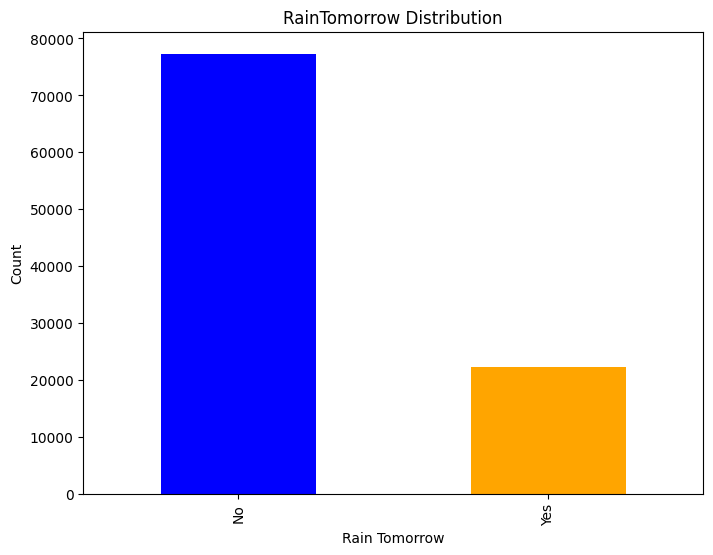

In [21]:
# Mengimport data
data = df_train['RainTomorrow'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color=['blue', 'orange'])

# Menambahkan judul dan label sumbu
plt.title('RainTomorrow Distribution')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

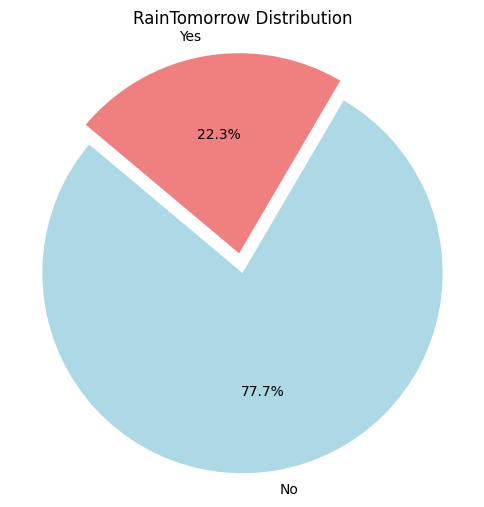

In [22]:
# Membuat pie chart
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Mengeksplosi "Yes"
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)

# Menambahkan judul
plt.title('RainTomorrow Distribution')

# Menampilkan plot
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Dari hasil penghitungan nilai counts pada kolom "RainTomorrow" dalam DataFrame "df", terdapat 110316 baris data dengan nilai "No" dan 31877 baris data dengan nilai "Yes". Hal ini menunjukkan bahwa mayoritas data (sekitar 77,6%) tidak menunjukkan kemungkinan hujan besok ("No"), sedangkan sekitar 22,4% data lainnya menunjukkan kemungkinan terjadinya hujan besok ("Yes"). Analisis ini dapat memberikan gambaran awal tentang sebaran data dan distribusinya, serta dapat digunakan untuk keperluan perencanaan atau prediksi cuaca di masa depan. Namun, untuk analisis yang lebih mendalam dan akurat, perlu dilakukan pengecekan lebih lanjut terhadap sumber data dan faktor-faktor yang memengaruhi hasil penghitungan tersebut.

## 4.3 Distribusi Kolom RainToday

In [23]:
df_train['RainToday'].value_counts()

No     77214
Yes    22326
Name: RainToday, dtype: int64

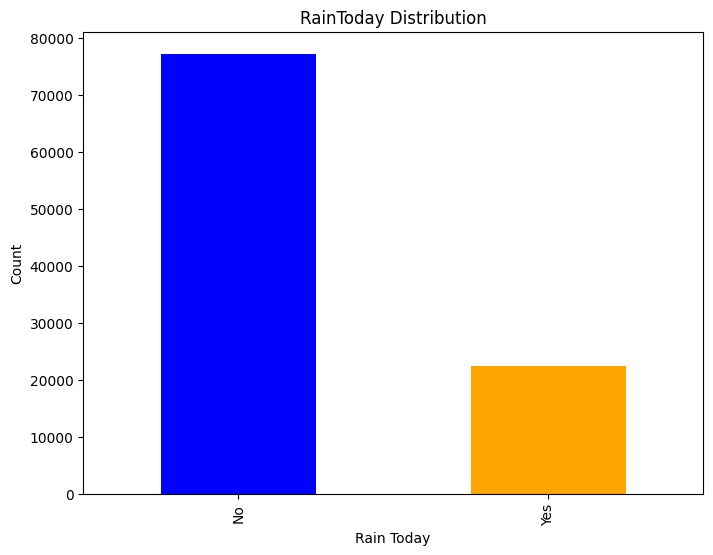

In [24]:
# Mengimport data
data = df_train['RainToday'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color=['blue', 'orange'])

# Menambahkan judul dan label sumbu
plt.title('RainToday Distribution')
plt.xlabel('Rain Today')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

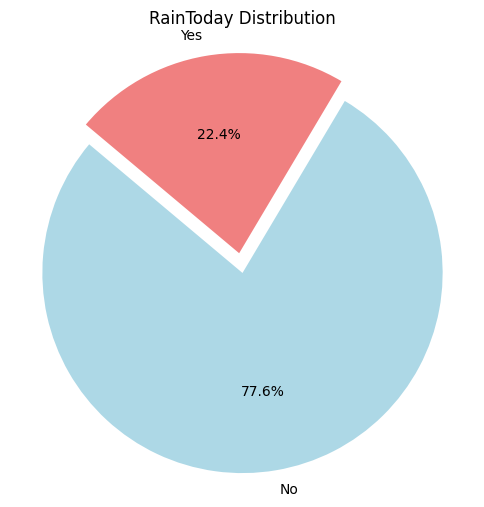

In [25]:
# Membuat pie chart
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Mengeksplosi "Yes"
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)

# Menambahkan judul
plt.title('RainToday Distribution')

# Menampilkan plot
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Dari hasil penghitungan nilai counts pada kolom "RainToday" dalam DataFrame "df", terdapat 77214 baris data dengan nilai "No" dan 22326 baris data dengan nilai "Yes". Hal ini menunjukkan bahwa mayoritas data (sekitar 77,6%) tidak menunjukkan kemungkinan hujan besok ("No"), sedangkan sekitar 22,4% data lainnya menunjukkan kemungkinan terjadinya hujan besok ("Yes"). Hasil tersebut sama sperti data pada kolom 'RainTomorrow'

## 4.4 Distribuasi Kombinasi RainToday dan RainTomorrow

In [26]:
# Memeriksa kondisi "Yes" dan "Yes"
yes_yes_count = df_train[(df_train['RainToday'] == 'Yes') & (df_train['RainTomorrow'] == 'Yes')].shape[0]

# Memeriksa kondisi "Yes" dan "No"
yes_no_count = df_train[(df_train['RainToday'] == 'Yes') & (df_train['RainTomorrow'] == 'No')].shape[0]

# Memeriksa kondisi "No" dan "No"
no_no_count = df_train[(df_train['RainToday'] == 'No') & (df_train['RainTomorrow'] == 'No')].shape[0]

# Memeriksa kondisi "No" dan "Yes"
no_yes_count = df_train[(df_train['RainToday'] == 'No') & (df_train['RainTomorrow'] == 'Yes')].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("Yes & Yes Count:", yes_yes_count)
print("Yes & No Count:", yes_no_count)
print("No & No Count:", no_no_count)
print("No & Yes Count:", no_yes_count)


Yes & Yes Count: 10175
Yes & No Count: 11848
No & No Count: 64972
No & Yes Count: 11577


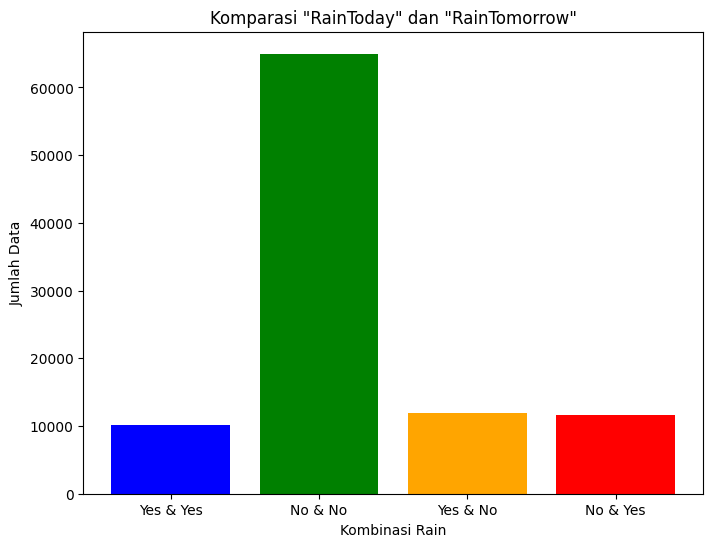

In [27]:
# Membuat bar chart
labels = ['Yes & Yes', 'No & No', 'Yes & No', 'No & Yes']
counts = [yes_yes_count, no_no_count, yes_no_count, no_yes_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green', 'orange', 'red'])

# Menambahkan judul dan label sumbu
plt.title('Komparasi "RainToday" dan "RainTomorrow"')
plt.xlabel('Kombinasi Rain')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

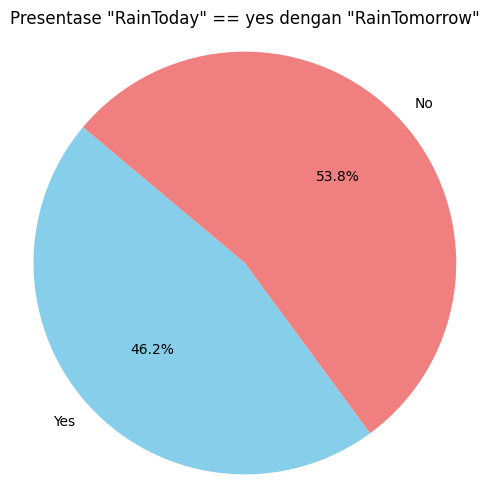

In [28]:
# Data untuk pie chart
labels = ['Yes', 'No']
sizes = [yes_yes_count, yes_no_count]
colors = ['skyblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Presentase "RainToday" == yes dengan "RainTomorrow"')

# Menampilkan plot
plt.axis('equal')
plt.show()

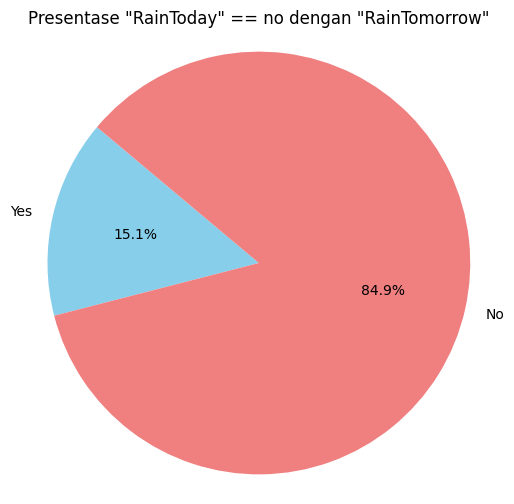

In [29]:
# Data untuk pie chart
labels = ['Yes', 'No']
sizes = [no_yes_count, no_no_count]
colors = ['skyblue', 'lightcoral']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Presentase "RainToday" == no dengan "RainTomorrow"')

# Menampilkan plot
plt.axis('equal')
plt.show()

Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'RainToday' dan 'RainTomorrow', kita dapat membuat kesimpulan sebagai berikut:

"Yes" dan "Yes" (Yes & Yes Count: 14,597): Ini mengindikasikan bahwa cuaca hujan hari ini (RainToday = Yes) dan cuaca hujan besok (RainTomorrow = Yes) terjadi pada 14,597 kasus.

"No" dan "No" (No & No Count: 92,728): Ini mengindikasikan bahwa cuaca tidak hujan hari ini (RainToday = No) dan cuaca tidak hujan besok (RainTomorrow = No) terjadi pada 92,728 kasus.

"Yes" dan "No" (Yes & No Count: 16,858): Ini mengindikasikan bahwa cuaca hujan hari ini (RainToday = Yes) tetapi cuaca tidak hujan besok (RainTomorrow = No) terjadi pada 16,858 kasus.

"No" dan "Yes" (No & Yes Count: 16,604): Ini mengindikasikan bahwa cuaca tidak hujan hari ini (RainToday = No) tetapi cuaca hujan besok (RainTomorrow = Yes) terjadi pada 16,604 kasus.

Dalam presentase:
Jika hari ini hujan presentase besok hujan 53.8%, presentase tidak hujan 46.2%
Jika hari ini tidak hujan presentase besok hujan 84.9%, presentase tidak hujan 15.1%

## 4.5 Distribusi data berdasarkan lokasi

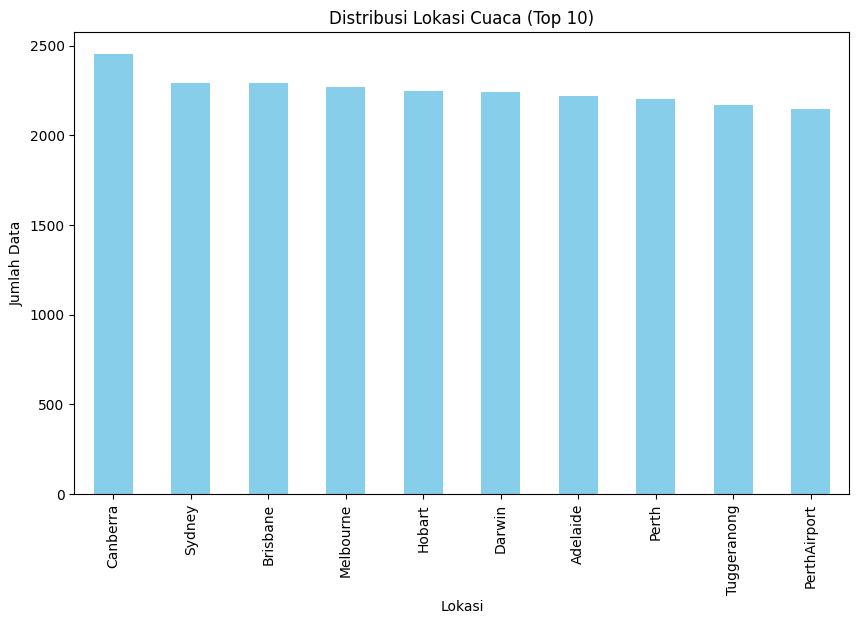

In [30]:
# Misalkan df_train adalah DataFrame Anda
location_counts = df_train['Location'].value_counts()

# Mengambil 10 lokasi teratas untuk visualisasi
top_10_locations = location_counts.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color='skyblue')
plt.title('Distribusi Lokasi Cuaca (Top 10)')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)  # Untuk memutar label sumbu x jika perlu

# Menampilkan plot
plt.show()


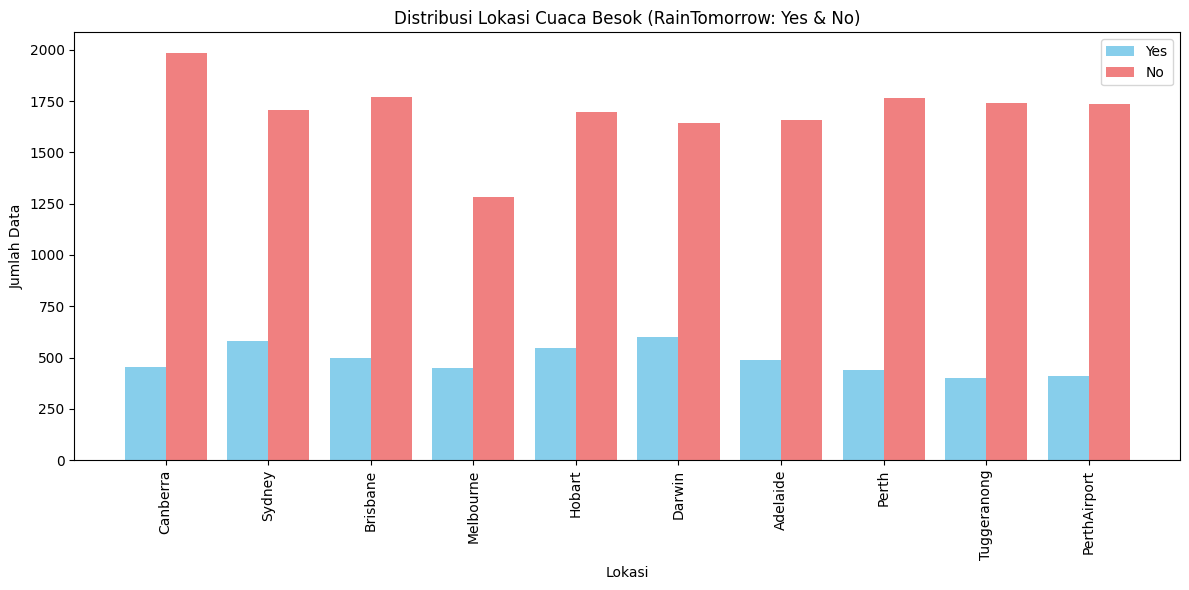

In [31]:
# Filter data berdasarkan "RainTomorrow" == "Yes"
rain_tomorrow_yes = df_train[df_train['RainTomorrow'] == 'Yes']

# Filter data berdasarkan "RainTomorrow" == "No"
rain_tomorrow_no = df_train[df_train['RainTomorrow'] == 'No']

# Membuat DataFrame terpisah untuk "Yes" dan "No" berdasarkan "RainTomorrow"
location_counts_yes = rain_tomorrow_yes['Location'].value_counts()
location_counts_no = rain_tomorrow_no['Location'].value_counts()

# Membuat bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart untuk "RainTomorrow" == "Yes"
bar_width = 0.4
bar_positions = range(len(top_10_locations))
ax.bar(bar_positions, location_counts_yes.loc[top_10_locations.index], width=bar_width, color='skyblue', label='Yes')

# Bar chart untuk "RainTomorrow" == "No" (bersebelahan dengan "Yes")
ax.bar([pos + bar_width for pos in bar_positions], location_counts_no.loc[top_10_locations.index], width=bar_width, color='lightcoral', label='No')

ax.set_title('Distribusi Lokasi Cuaca Besok (RainTomorrow: Yes & No)')
ax.set_xlabel('Lokasi')
ax.set_ylabel('Jumlah Data')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(top_10_locations.index)
ax.tick_params(axis='x', rotation=90)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## 4.6 Distribusi Rainfall

Berdasarkan distribusi data diatas, dapat disimpulkan sebagai berikut:

Seluruh kota pada top 10 distribusi data memiliki jumlah hari yang lebih banyak "No" (tidak hujan) daripada "Yes" (hujan besok).

Kota-kota seperti Sydney, Darwin, Hobart, Albany  dan MountGambier masih cenderung memiliki lebih banyak hari "Yes" (hujan) dibandingkan kota lainya

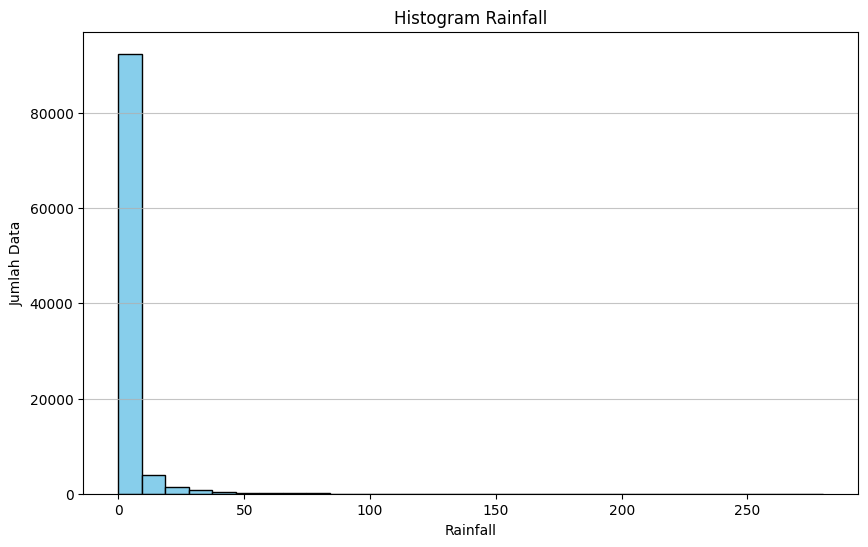

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['Rainfall'], bins=30, range=(0, 280), color='skyblue', edgecolor='black')
plt.title('Histogram Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', alpha=0.75)

plt.show()

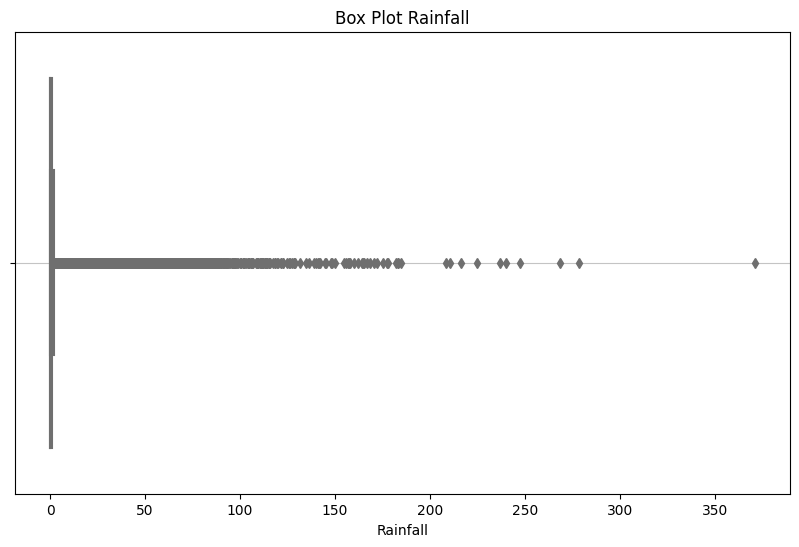

In [33]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Rainfall'].dropna(), color='skyblue')
plt.title('Box Plot Rainfall')
plt.xlabel('Rainfall')
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan distribusi 'RainFall' disimpulkan bahwa histogram mencerminkan sebaran data cuaca yang variabel, dengan mayoritas hari cuaca memiliki hujan dalam jumlah yang relatif rendah hingga sedang, sementara hujan deras terjadi dalam situasi yang jarang terjadi.

## 4.7 Distribusi Sunshine

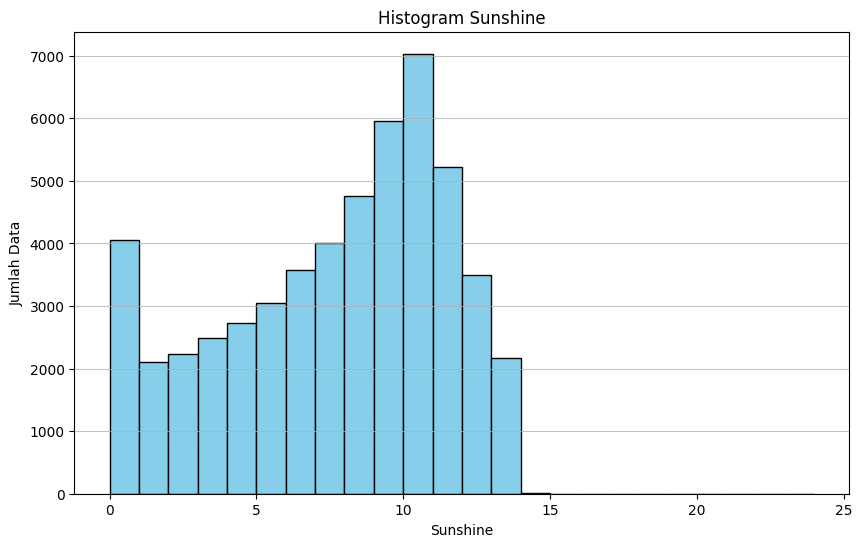

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['Sunshine'], bins=24, range=(0, 24), color='skyblue', edgecolor='black')
plt.title('Histogram Sunshine')
plt.xlabel('Sunshine')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', alpha=0.75)

plt.show()

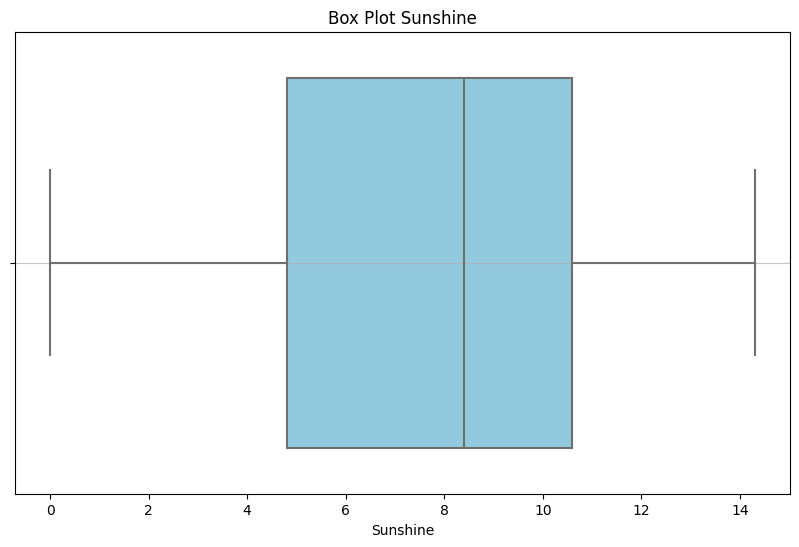

In [35]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['Sunshine'].dropna(), color='skyblue')
plt.title('Box Plot Sunshine')
plt.xlabel('Sunshine')
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan distribusi 'Sunshine' disimpulkan bahwa histogram mencerminkan waktu (dalam jam) ketika matahari bersinar sepanjang hari. Distribusi data menunjukkan bahwa matahari bersinar paling lama pada waktu-waktu tertentu, dengan puncak frekuensi terjadi pada interval waktu antara 9 jam hingga 14 jam.

## 4.8 Distribusi WinGustDir

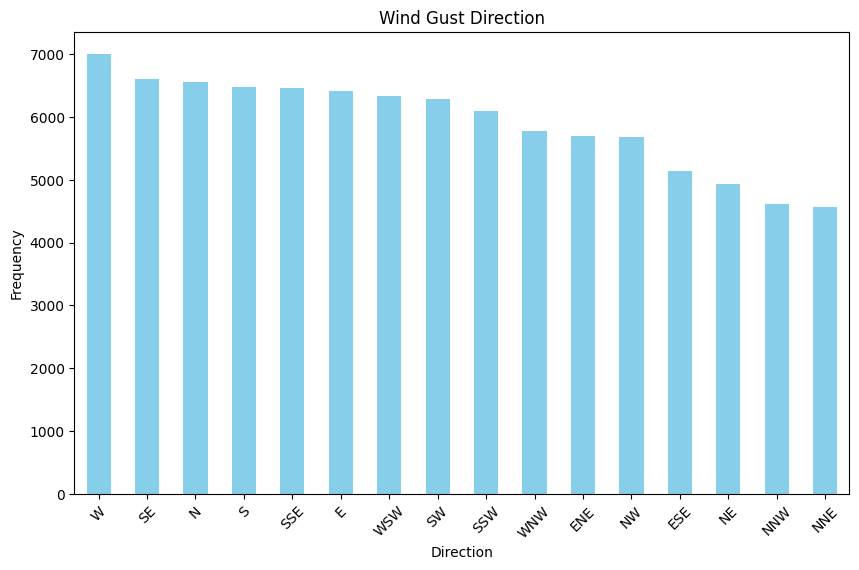

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_train['WindGustDir'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Wind Gust Direction')
plt.xlabel('Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Berdasarkan distribusi 'WinGustDir' dapat disimpulkan sebagai berikut:

Arah Angin Utama: Arah angin utama yang paling umum terjadi adalah "W" (Barat), diikuti oleh "SE" (Tenggara) dan "N" (Utara).

Variasi Arah Angin: Data menunjukkan variasi yang signifikan dalam arah angin, dengan berbagai arah angin yang tercatat. Arah angin "NNW" (Barat Laut) dan "NNE" (Timur Laut) adalah yang paling jarang terjadi.

## 4.9 Distribusi WindGustSpeed

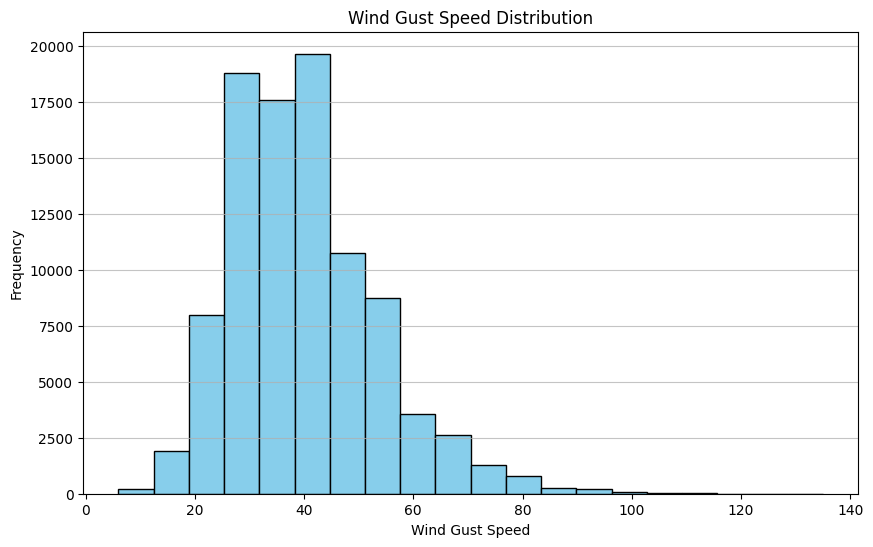

In [37]:
plt.figure(figsize=(10, 6))
df_train['WindGustSpeed'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Wind Gust Speed Distribution')
plt.xlabel('Wind Gust Speed')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan distribusi 'WindGustSpeed' dapat disimpulkan sebagai berikut:

Kecepatan Angin Tertinggi: Kecepatan angin paling sering tercatat berkisar antara 25.35 hingga 38.25 km/jam. Frekuensi tertinggi terjadi di rentang kecepatan angin ini.

Variabilitas Kecepatan Angin: Data menunjukkan variasi kecepatan angin yang signifikan, mulai dari 6.00 hingga 128.55 km/jam. Namun, frekuensi menurun secara signifikan saat kecepatan angin melebihi 70 km/jam.

Frekuensi Tinggi: Frekuensi tertinggi terjadi pada kecepatan angin berkisar antara 25.35 hingga 38.25 km/jam. Ini menunjukkan bahwa kebanyakan kecepatan angin dalam kisaran ini.

Kecepatan Angin Rendah: Kecepatan angin di bawah 25.35 km/jam memiliki frekuensi yang lebih rendah, menunjukkan bahwa kecepatan angin rendah tidak terlalu umum.

## 4.10 WinDir 9am & 3pm

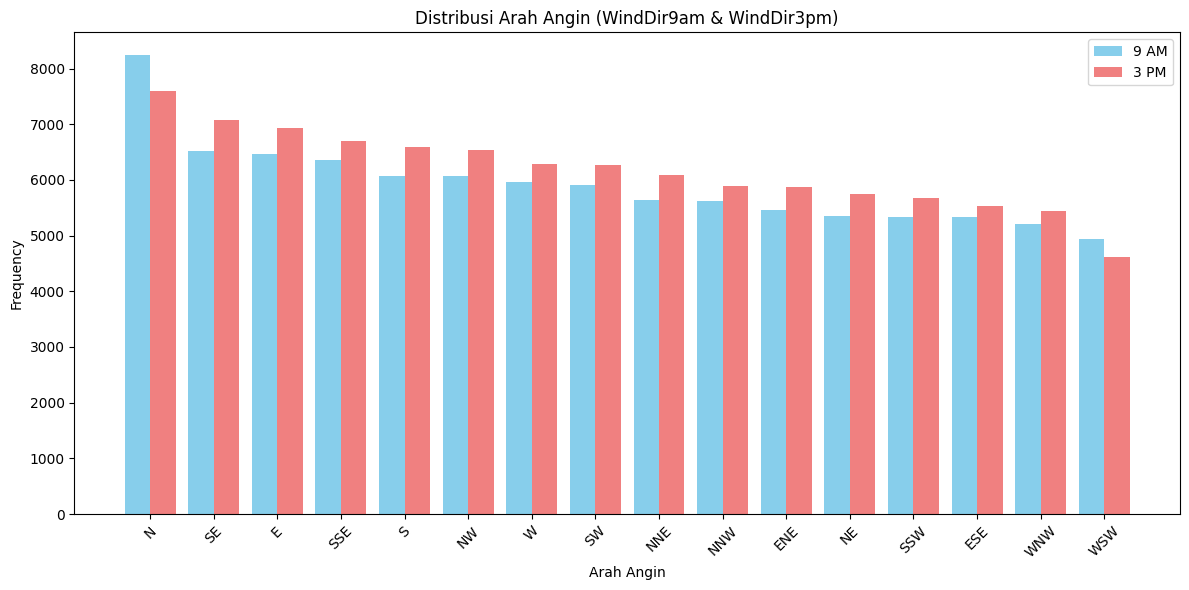

In [38]:
# Menghitung frekuensi arah angin pada pukul 9 pagi
wind_dir_9am_counts = df_train['WindDir9am'].value_counts()
# Menghitung frekuensi arah angin pada pukul 3 sore
wind_dir_3pm_counts = df_train['WindDir3pm'].value_counts()

# Membuat gambar dan sumbu
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart untuk "WindDir9am"
bar_width = 0.4
bar_positions = range(len(wind_dir_9am_counts))
ax.bar(bar_positions, wind_dir_9am_counts, width=bar_width, color='skyblue', label='9 AM')

# Bar chart untuk "WindDir3pm" (bersebelahan dengan "WindDir9am")
ax.bar([pos + bar_width for pos in bar_positions], wind_dir_3pm_counts, width=bar_width, color='lightcoral', label='3 PM')

ax.set_title('Distribusi Arah Angin (WindDir9am & WindDir3pm)')
ax.set_xlabel('Arah Angin')
ax.set_ylabel('Frequency')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(wind_dir_9am_counts.index)
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari distibrusi data diatas dapat disimpulkan sebagai berikut:

Arah angin yang paling umum pada kedua waktu (pukul 9 pagi dan pukul 3 sore) adalah "N" (Utara), yang memiliki frekuensi tertinggi.

Arah angin "SE" (Tenggara), "E" (Timur), dan "SSE" (Selatan Tenggara) juga cukup umum pada kedua waktu.

Arah angin "WSW" (Barat Daya) memiliki frekuensi yang lebih rendah dibandingkan dengan yang lain pada pukul 9 pagi, sedangkan "NNE" (Utara Laut) dan "NNW" (Utara Barat Laut) lebih rendah pada pukul 3 sore.

Beberapa arah angin memiliki perubahan frekuensi yang cukup signifikan antara pukul 9 pagi dan pukul 3 sore, seperti "S" (Selatan) yang mengalami penurunan dan "NE" (Timur Laut) yang mengalami peningkatan.

## 4.11 Distribusi Humidity9am & Huidity3pm

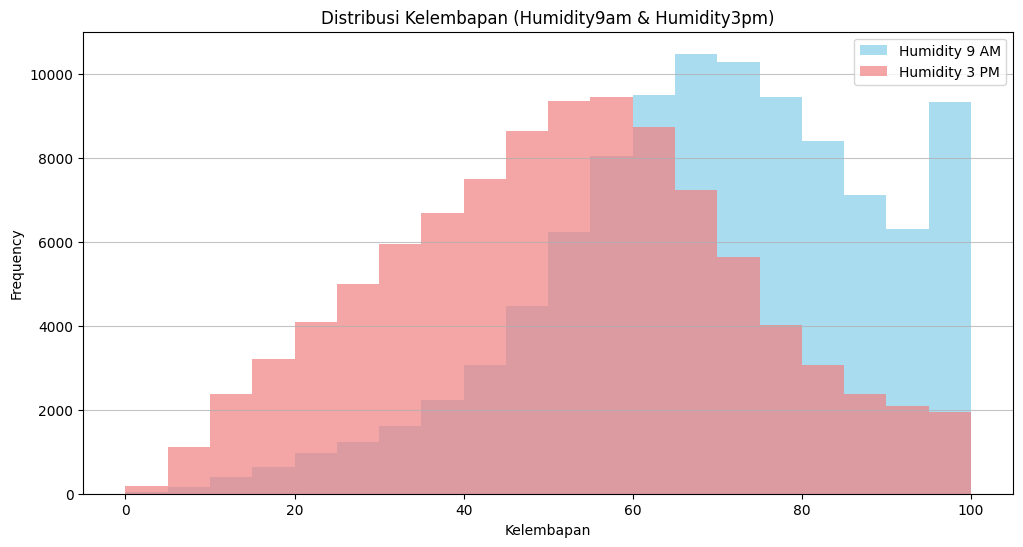

In [39]:
import matplotlib.pyplot as plt

# Data kelembapan pukul 9 pagi
humidity_9am = df_train['Humidity9am'].dropna()

# Data kelembapan pukul 3 sore
humidity_3pm = df_train['Humidity3pm'].dropna()

# Membuat histogram
plt.figure(figsize=(12, 6))
plt.hist(humidity_9am, bins=20, color='skyblue', alpha=0.7, label='Humidity 9 AM')
plt.hist(humidity_3pm, bins=20, color='lightcoral', alpha=0.7, label='Humidity 3 PM')
plt.title('Distribusi Kelembapan (Humidity9am & Humidity3pm)')
plt.xlabel('Kelembapan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()


Dari distribusi data diatass dapat disimpulkan sebagai berikut:

Data kelembapan pada pukul 9 pagi (Humidity9am) dan pukul 3 sore (Humidity3pm) terdistribusi pada beberapa rentang kelembapan yang berbeda.

Rentang kelembapan dari 0.0 hingga 50.0 memiliki frekuensi yang lebih tinggi, terutama pada kelembapan pada pukul 9 pagi (Humidity9am).

Rentang kelembapan pada pukul 3 sore (Humidity3pm) cenderung lebih tinggi dibandingkan dengan kelembapan pada pukul 9 pagi (Humidity9am) dalam rentang yang lebih luas.

Secara umum, kelembapan pada pukul 3 sore (Humidity3pm) cenderung lebih tinggi daripada kelembapan pada pukul 9 pagi (Humidity9am).

## 4.12 Distribusi Temp9am & Temp3am

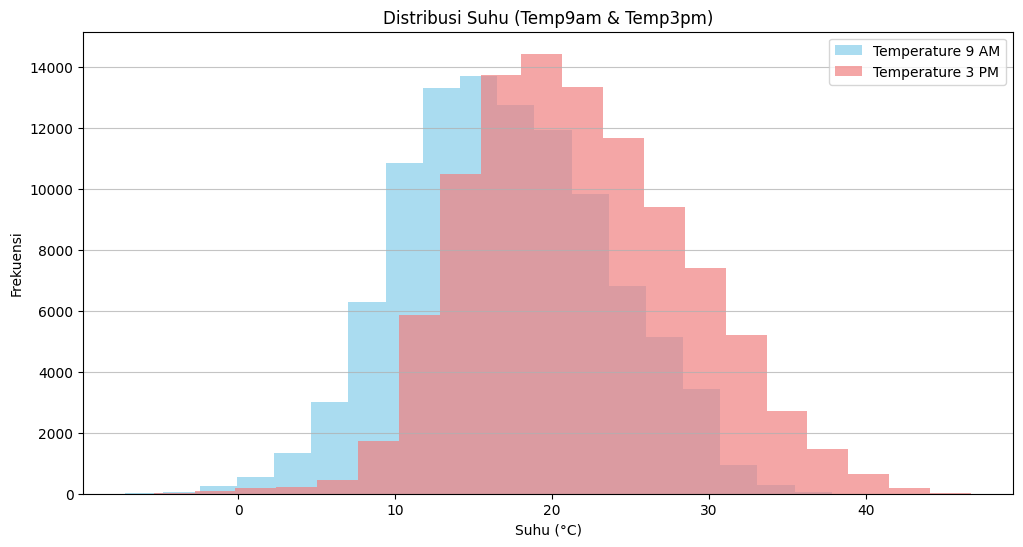

In [40]:
# Data suhu pukul 9 pagi
temp_9am = df_train['Temp9am'].dropna()

# Data suhu pukul 3 sore
temp_3pm = df_train['Temp3pm'].dropna()

# Membuat histogram
plt.figure(figsize=(12, 6))
plt.hist(temp_9am, bins=20, color='skyblue', alpha=0.7, label='Temperature 9 AM')
plt.hist(temp_3pm, bins=20, color='lightcoral', alpha=0.7, label='Temperature 3 PM')
plt.title('Distribusi Suhu (Temp9am & Temp3pm)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

Dari distribusi data diatas dapat disimpulkan sebagai berikut:

Rentang suhu pada pukul 9 pagi (Temp9am) dan pukul 3 sore (Temp3pm) disajikan dalam kelompok bin suhu.

Rentang suhu berkisar dari -7,200 hingga 44,005.

Terdapat perbedaan dalam frekuensi suhu antara pukul 9 pagi dan pukul 3 sore:

Suhu pada pukul 3 sore (Temp3pm) cenderung lebih tinggi dibandingkan dengan suhu pada pukul 9 pagi (Temp9am) di hampir semua bin suhu.
Frekuensi tertinggi terjadi pada bin suhu antara 19.750 hingga 22.445 pada pukul 9 pagi (Temp9am) dan 27.835 hingga 30.530 pada pukul 3 sore (Temp3pm).

Pada pukul 3 sore (Temp3pm), ada peningkatan signifikan dalam frekuensi suhu di bin suhu yang lebih tinggi, khususnya pada bin suhu di atas 33.225.

Sebagian besar bin suhu memiliki frekuensi yang lebih tinggi pada pukul 3 sore (Temp3pm) dibandingkan dengan pukul 9 pagi (Temp9am), menunjukkan tren umum peningkatan suhu seiring berjalannya waktu.

Data ini memberikan wawasan tentang perubahan suhu selama hari dan perbedaan suhu antara pukul 9 pagi dan 3 sore.

## 4.13 Matriks Korelasi

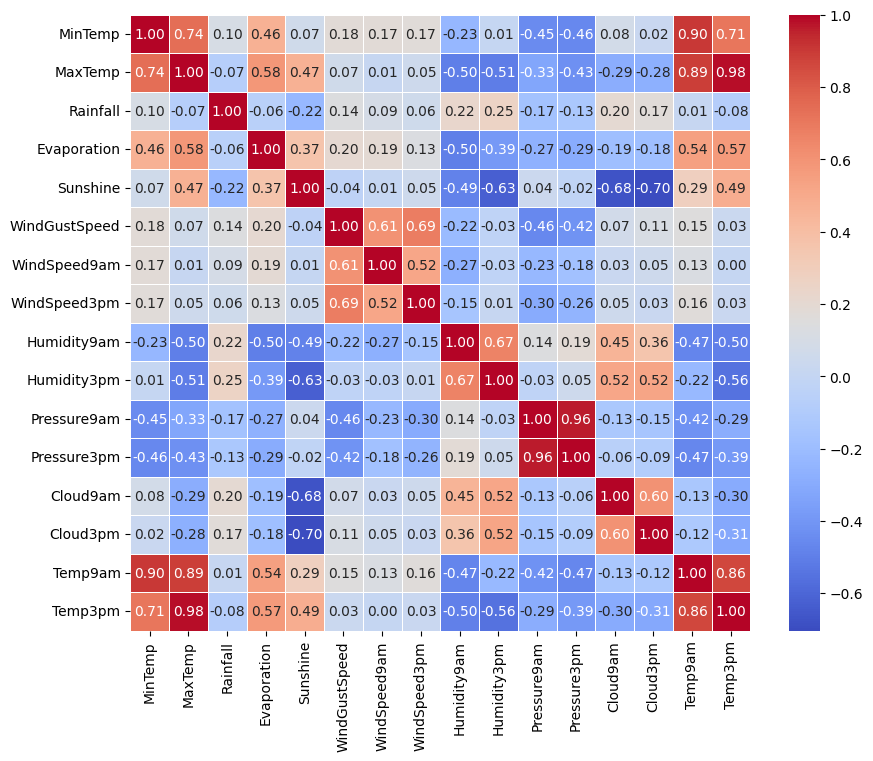

In [148]:
# Membuat matriks korelasi
correlation_matrix = df_train.corr()

# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menampilkan plot
plt.show()

Berdasarkan korelasi diatas, dapat disimpulkan:

Temperatur (MinTemp, MaxTemp, Temp9am, Temp3pm):
MinTemp dan MaxTemp memiliki korelasi positif yang kuat sekitar 0.74, menunjukkan bahwa suhu minimal cenderung meningkat seiring dengan suhu maksimal.
Suhu pada pukul 9 pagi (Temp9am) dan pukul 3 sore (Temp3pm) juga menunjukkan korelasi positif yang kuat, sekitar 0.86.

Kecepatan Angin (WindGustSpeed, WindSpeed9am, WindSpeed3pm):
WindGustSpeed memiliki korelasi positif yang moderat dengan WindSpeed9am (0.61) dan WindSpeed3pm (0.69), menunjukkan bahwa kecepatan angin saat puncak (gust) berkorelasi dengan kecepatan angin pada pagi dan sore hari.

Kelembaban (Humidity9am, Humidity3pm):
Korelasi antara Humidity9am dan Humidity3pm sekitar 0.67, menandakan bahwa tingkat kelembaban pada pagi hari berkorelasi dengan tingkat kelembaban pada sore hari.

Tekanan Udara (Pressure9am, Pressure3pm):
Korelasi antara Pressure9am dan Pressure3pm tinggi, sekitar 0.96, menunjukkan bahwa tekanan udara pada pagi hari berkorelasi kuat dengan tekanan udara pada sore hari.

Awan (Cloud9am, Cloud3pm):
Korelasi antara Cloud9am dan Cloud3pm sekitar 0.60, menunjukkan korelasi positif antara keberadaan awan pada pagi dan sore hari.

# 5. Data Preprocessing

## 5.1 Penangan terhadap data null

In [41]:
# drop kolom tanggal
df_train.drop('Date', axis=1, inplace=True)
df_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
141565,Darwin,22.2,34.2,0.0,4.8,11.1,E,48.0,SE,E,...,66.0,27.0,1013.3,1009.4,1.0,1.0,25.7,33.4,No,No
85325,Brisbane,16.9,31.4,0.0,4.6,11.5,E,20.0,WSW,ENE,...,50.0,50.0,1013.3,1011.4,1.0,2.0,24.7,29.4,No,No
17847,Newcastle,8.8,20.9,2.4,NaN,NaN,NaN,NaN,N,NaN,...,39.0,NaN,NaN,NaN,6.0,NaN,17.0,NaN,Yes,No
69746,Melbourne,NaN,NaN,NaN,2.0,1.3,SE,28.0,SSW,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98356,Adelaide,11.8,21.3,1.2,NaN,9.1,S,35.0,SSW,SSE,...,75.0,60.0,1016.1,1017.1,NaN,NaN,18.2,19.3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,Albany,10.0,17.2,0.0,9.6,8.8,NaN,NaN,SW,SSE,...,58.0,58.0,1027.2,1025.7,7.0,1.0,13.8,16.0,No,No
119879,PerthAirport,7.7,21.1,0.0,1.4,8.9,E,35.0,NE,SSE,...,69.0,43.0,1026.7,1023.0,1.0,1.0,12.3,20.1,No,No
103694,Nuriootpa,7.6,21.7,0.0,6.0,11.2,SE,39.0,NE,ESE,...,85.0,42.0,1021.1,1019.6,2.0,2.0,13.7,21.2,No,No
131932,Hobart,8.8,14.8,0.0,1.2,2.0,NNE,56.0,N,NNE,...,56.0,62.0,998.7,990.9,3.0,7.0,14.1,13.6,No,No


In [42]:
# Menampilkan kembali presentase missing values pada setiap atribut
df_train.apply(lambda x: f'{((x.isnull().sum()/df_train.shape[0])*100).round(2)} %')

Location           0.0 %
MinTemp           1.01 %
MaxTemp           0.85 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.04 %
WindGustDir       7.06 %
WindGustSpeed     7.02 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm       2.1 %
Humidity9am       1.84 %
Humidity3pm       3.12 %
Pressure9am      10.36 %
Pressure3pm      10.35 %
Cloud9am         38.43 %
Cloud3pm          40.8 %
Temp9am           1.22 %
Temp3pm           2.49 %
RainToday         2.24 %
RainTomorrow      2.23 %
dtype: object

### 5.1.1 Drop kolom dengan presentase nul >30%

In [43]:
df_train.drop('Location', axis=1, inplace=True)
df_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
141565,22.2,34.2,0.0,4.8,11.1,E,48.0,SE,E,19.0,...,66.0,27.0,1013.3,1009.4,1.0,1.0,25.7,33.4,No,No
85325,16.9,31.4,0.0,4.6,11.5,E,20.0,WSW,ENE,7.0,...,50.0,50.0,1013.3,1011.4,1.0,2.0,24.7,29.4,No,No
17847,8.8,20.9,2.4,NaN,NaN,NaN,NaN,N,NaN,28.0,...,39.0,NaN,NaN,NaN,6.0,NaN,17.0,NaN,Yes,No
69746,NaN,NaN,NaN,2.0,1.3,SE,28.0,SSW,SSE,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98356,11.8,21.3,1.2,NaN,9.1,S,35.0,SSW,SSE,13.0,...,75.0,60.0,1016.1,1017.1,NaN,NaN,18.2,19.3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,10.0,17.2,0.0,9.6,8.8,NaN,NaN,SW,SSE,2.0,...,58.0,58.0,1027.2,1025.7,7.0,1.0,13.8,16.0,No,No
119879,7.7,21.1,0.0,1.4,8.9,E,35.0,NE,SSE,15.0,...,69.0,43.0,1026.7,1023.0,1.0,1.0,12.3,20.1,No,No
103694,7.6,21.7,0.0,6.0,11.2,SE,39.0,NE,ESE,6.0,...,85.0,42.0,1021.1,1019.6,2.0,2.0,13.7,21.2,No,No
131932,8.8,14.8,0.0,1.2,2.0,NNE,56.0,N,NNE,19.0,...,56.0,62.0,998.7,990.9,3.0,7.0,14.1,13.6,No,No


In [44]:
# drop kolom dengan presentase null 30% karena kolom dengan null yang tinggi akan memberikan pengaruh yang signifikan
missing_val = pd.DataFrame(df_train.isnull().sum(), columns=['missing_count'])
missing_val['total_count'] = df_train.shape[0]
missing_val['persentase_nan(%)'] = (missing_val['missing_count'] / missing_val['total_count']) * 100
missing_val = missing_val[missing_val['persentase_nan(%)']>30]
missing_val

,missing_count,total_count,persentase_nan(%)
Evaporation,43955,101822,43.168470
Sunshine,48920,101822,48.044627
Cloud9am,39133,101822,38.432755
Cloud3pm,41548,101822,40.804541


In [45]:
list_missing_val = missing_val.index.tolist()
list_missing_val

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [46]:
df_train.drop(list_missing_val, axis=1, inplace=True)

In [47]:
df_train.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
141565,22.2,34.2,0.0,E,48.0,SE,E,19.0,19.0,66.0,27.0,1013.3,1009.4,25.7,33.4,No,No
85325,16.9,31.4,0.0,E,20.0,WSW,ENE,7.0,7.0,50.0,50.0,1013.3,1011.4,24.7,29.4,No,No
17847,8.8,20.9,2.4,NaN,NaN,N,NaN,28.0,NaN,39.0,NaN,NaN,NaN,17.0,NaN,Yes,No


In [48]:
# Menampilkan kembali presentase missing values pada setiap atribut
df_train.apply(lambda x: f'{((x.isnull().sum()/df_train.shape[0])*100).round(2)} %')

MinTemp           1.01 %
MaxTemp           0.85 %
Rainfall          2.24 %
WindGustDir       7.06 %
WindGustSpeed     7.02 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm       2.1 %
Humidity9am       1.84 %
Humidity3pm       3.12 %
Pressure9am      10.36 %
Pressure3pm      10.35 %
Temp9am           1.22 %
Temp3pm           2.49 %
RainToday         2.24 %
RainTomorrow      2.23 %
dtype: object

### 5.1.2 Mengisi nilai median pada data null di kolom numerik

In [49]:
df_train.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [50]:
# membagi menjadi kaegorikal dan numerikal
categorical = [cols for cols in df_train.columns if df_train[cols].dtypes=='object']
numerical = [cols for cols in df_train.columns if df_train[cols].dtypes=='float64']

In [51]:
# mengisi nilai rata-rata pada kolom numerik
for col in numerical:
    df_train[col].fillna(df_train[col].median(), inplace=True)

In [52]:
# Menampilkan kembali presentase missing values pada setiap atribut
df_train.apply(lambda x: f'{((x.isnull().sum()/df_train.shape[0])*100).round(2)} %')

MinTemp           0.0 %
MaxTemp           0.0 %
Rainfall          0.0 %
WindGustDir      7.06 %
WindGustSpeed     0.0 %
WindDir9am       7.26 %
WindDir3pm       2.91 %
WindSpeed9am      0.0 %
WindSpeed3pm      0.0 %
Humidity9am       0.0 %
Humidity3pm       0.0 %
Pressure9am       0.0 %
Pressure3pm       0.0 %
Temp9am           0.0 %
Temp3pm           0.0 %
RainToday        2.24 %
RainTomorrow     2.23 %
dtype: object

In [53]:
# drop baris pada kolom yang masih memiliki nilai null
missing_val = pd.DataFrame(df_train.isnull().sum(), columns=['missing_count'])
missing_val['total_count'] = df_train.shape[0]
missing_val['persentase_nan(%)'] = (missing_val['missing_count'] / missing_val['total_count']) * 100
missing_val = missing_val[missing_val['persentase_nan(%)']>0]
missing_val

,missing_count,total_count,persentase_nan(%)
WindGustDir,7186,101822,7.057414
WindDir9am,7396,101822,7.263656
WindDir3pm,2964,101822,2.910962
RainToday,2282,101822,2.241166
RainTomorrow,2269,101822,2.228399


In [54]:
list_missing_val = missing_val.index.tolist()
list_missing_val

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [55]:
df_train.dropna(subset=list_missing_val, axis=0, inplace=True)
df_train.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
141565,22.2,34.2,0.0,E,48.0,SE,E,19.0,19.0,66.0,27.0,1013.3,1009.4,25.7,33.4,No,No
85325,16.9,31.4,0.0,E,20.0,WSW,ENE,7.0,7.0,50.0,50.0,1013.3,1011.4,24.7,29.4,No,No
98356,11.8,21.3,1.2,S,35.0,SSW,SSE,13.0,17.0,75.0,60.0,1016.1,1017.1,18.2,19.3,Yes,No


In [56]:
# Menampilkan kembali presentase missing values pada setiap atribut
df_train.apply(lambda x: f'{((x.isnull().sum()/df_train.shape[0])*100).round(2)} %')

MinTemp          0.0 %
MaxTemp          0.0 %
Rainfall         0.0 %
WindGustDir      0.0 %
WindGustSpeed    0.0 %
WindDir9am       0.0 %
WindDir3pm       0.0 %
WindSpeed9am     0.0 %
WindSpeed3pm     0.0 %
Humidity9am      0.0 %
Humidity3pm      0.0 %
Pressure9am      0.0 %
Pressure3pm      0.0 %
Temp9am          0.0 %
Temp3pm          0.0 %
RainToday        0.0 %
RainTomorrow     0.0 %
dtype: object

## 5.2 Kategorikal encoder

In [57]:
new_cat = [data for data in categorical if data != 'RainTomorrow']
new_df_train = pd.get_dummies(df_train, columns=new_cat).drop(['RainTomorrow'], axis=1)

# Display the result
print(new_df_train)

        MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
141565     22.2     34.2       0.0           48.0          19.0          19.0   
85325      16.9     31.4       0.0           20.0           7.0           7.0   
98356      11.8     21.3       1.2           35.0          13.0          17.0   
45159      15.0     20.4       9.6           35.0          19.0          11.0   
72892      18.6     35.6       0.0           52.0          19.0          24.0   
...         ...      ...       ...            ...           ...           ...   
54886      12.6     21.6       0.0           52.0          20.0          19.0   
119879      7.7     21.1       0.0           35.0          15.0           9.0   
103694      7.6     21.7       0.0           39.0           6.0          17.0   
131932      8.8     14.8       0.0           56.0          19.0          28.0   
121958     15.8     40.6       0.0           31.0           9.0          13.0   

        Humidity9am  Humidi

setelah melakukan label encoder fitur bertambah jadi 63 fitur, 62 fitur atribut dan 1 target

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_df_train = df_train.copy()

df_category = target_df_train.select_dtypes(include=['object'])

label_mappings = {}  # Membuat kamus kosong untuk menyimpan label mappings

for kolom in df_category.columns:
    le.fit(df_category[kolom])
    target_df_train[kolom] = le.transform(df_category[kolom])

    if kolom in ['RainTomorrow']:
        print(f"kolom = {kolom}")
        label_mapping = {label: code for label, code in zip(le.classes_, le.transform(le.classes_))}
        label_mappings[kolom] = label_mapping  # Menambahkan label mapping ke kamus
        for label, code in label_mapping.items():
            print(f"label asli: {label} label encode: {code}")
        print()

target_df_train = target_df_train['RainTomorrow']
target_df_train

kolom = RainTomorrow
label asli: No label encode: 0
label asli: Yes label encode: 1



141565    0
85325     0
98356     0
45159     0
72892     0
         ..
54886     0
119879    0
103694    0
131932    0
121958    0
Name: RainTomorrow, Length: 86566, dtype: int64

## 5.3 Feature Selection

In [59]:
X = new_df_train
y = target_df_train
print(X.shape)
print(y.shape)

(86566, 62)
(86566,)


In [60]:
selector = SelectKBest()  # Atur nilai K sesuai kebutuhan
X_new = selector.fit_transform(X, y)

In [61]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False)

pd.set_option('display.max_rows', None)

print("Skor fitur dari yang tertinggi:")
print(sorted_feature_scores)

Skor fitur dari yang tertinggi:
            Feature         Score
7       Humidity3pm  21867.428442
61    RainToday_Yes   9557.158830
60     RainToday_No   9557.158830
6       Humidity9am   6838.738762
2          Rainfall   5353.545055
3     WindGustSpeed   5156.378471
8       Pressure9am   5138.085186
9       Pressure3pm   4284.064829
11          Temp3pm   3525.148736
1           MaxTemp   2461.461436
5      WindSpeed3pm    837.766504
4      WindSpeed9am    790.098986
0           MinTemp    522.434375
31     WindDir9am_N    304.221490
28     WindDir9am_E    249.775936
34   WindDir9am_NNW    224.835593
37    WindDir9am_SE    188.334414
30   WindDir9am_ESE    181.944877
12    WindGustDir_E    177.391163
51    WindDir3pm_NW    171.143142
26  WindGustDir_WNW    153.758948
19   WindGustDir_NW    150.554734
58   WindDir3pm_WNW    139.424436
13  WindGustDir_ENE    133.058012
47     WindDir3pm_N    112.246001
25    WindGustDir_W    109.650197
14  WindGustDir_ESE    107.789085
10          Temp

In [62]:
best_feature = sorted_feature_scores[0:10]
best_feature = best_feature['Feature']
best_feature.tolist()

['Humidity3pm',
 'RainToday_Yes',
 'RainToday_No',
 'Humidity9am',
 'Rainfall',
 'WindGustSpeed',
 'Pressure9am',
 'Pressure3pm',
 'Temp3pm',
 'MaxTemp']

In [63]:
X_feat = X[best_feature]
X_feat.head(3)

,Humidity3pm,RainToday_Yes,RainToday_No,Humidity9am,Rainfall,WindGustSpeed,Pressure9am,Pressure3pm,Temp3pm,MaxTemp
141565,27.0,0,1,66.0,0.0,48.0,1013.3,1009.4,33.4,34.2
85325,50.0,0,1,50.0,0.0,20.0,1013.3,1011.4,29.4,31.4
98356,60.0,1,0,75.0,1.2,35.0,1016.1,1017.1,19.3,21.3


In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_feat, y)

In [65]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(134972, 10)
(134972,)


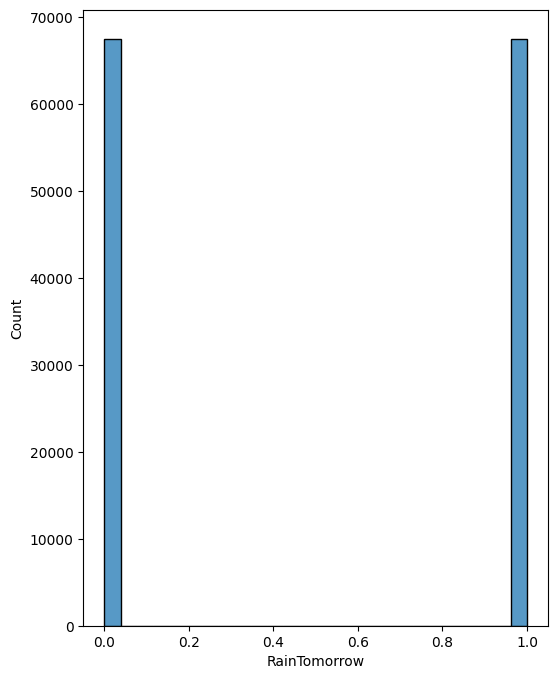

In [66]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.histplot( data=y_train_resampled)
plt.show()

## 5.4 Method Preprocessing

In [67]:
def preprocessing(dataframe, data_train):
  df = dataframe.copy()
  unfaedah_list = ['Date', 'Location']
  list_missing_val_up30 = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
  list_missing_val_un10 = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
  best_features = ['Humidity3pm',
                  'RainToday_Yes',
                  'RainToday_No',
                  'Humidity9am',
                  'Rainfall',
                  'WindGustSpeed',
                  'Pressure9am',
                  'Pressure3pm',
                  'Temp3pm',
                  'MaxTemp']

  # drop kolom tanggal dan lokasi
  df.drop(unfaedah_list + list_missing_val_up30, axis=1, inplace=True)

  # membagi menjadi kaegorikal dan numerikal
  categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
  numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

  # mengisi nilai rata-rata pada kolom numerik
  for col in numerical:
      df[col].fillna(data_train[col].mean(), inplace=True)

  df.dropna(subset=list_missing_val_un10, axis=0, inplace=True)

  new_cat = [data for data in categorical if data != 'RainTomorrow']
  new_df_train = pd.get_dummies(df, columns=new_cat).drop(['RainTomorrow'], axis=1)

  le = LabelEncoder()
  target_df_train = df.copy()

  df_category = target_df_train.select_dtypes(include=['object'])

  label_mappings = {}  # Membuat kamus kosong untuk menyimpan label mappings

  for kolom in df_category.columns:
      le.fit(df_category[kolom])
      target_df_train[kolom] = le.transform(df_category[kolom])

      if kolom in ['RainTomorrow']:
          print(f"kolom = {kolom}")
          label_mapping = {label: code for label, code in zip(le.classes_, le.transform(le.classes_))}
          label_mappings[kolom] = label_mapping  # Menambahkan label mapping ke kamus
          for label, code in label_mapping.items():
              print(f"label asli: {label} label encode: {code}")
          print()

  target_df_train = target_df_train['RainTomorrow']
  target_df_train

  X = new_df_train[best_features]
  y = target_df_train

  return X, y

In [68]:
X_df_test, y_df_test = preprocessing(df_test, df_train)
print(X_df_test.head(3))
print('====')
print(y_df_test.head(3))

kolom = RainTomorrow
label asli: No label encode: 0
label asli: Yes label encode: 1

        Humidity3pm  RainToday_Yes  RainToday_No  Humidity9am  Rainfall  \
100721         64.0              1             0         73.0       4.2   
31173          64.0              1             0         90.0      14.0   
573            54.0              0             1         99.0       0.2   

        WindGustSpeed  Pressure9am  Pressure3pm  Temp3pm  MaxTemp  
100721           54.0  1005.200000       1003.7     17.6     18.9  
31173            50.0  1017.404873       1018.4     19.1     19.6  
573              22.0  1024.300000       1021.8     11.5     11.9  
====
100721    1
31173     0
573       0
Name: RainTomorrow, dtype: int64


# 6. Modelling

## 6.3 Logistic Regression

### 6.3.1 Pelatihan model

In [85]:
# # test_size = 0.30 artinya data testing 30% dan data training 70%
# # random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

# X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.3, random_state = 42)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membuat model Logistic Regression
model_LR = LogisticRegression(random_state=42)

# Melakukan fitting pada data
model_LR.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

### 6.3.2 Evaluasi Model

In [103]:
# Prediksi model
y_pred_LR = model_LR.predict(X_df_test)

# Menghitung metrik presisi, recall, dan F1-score
accuracy_lr = accuracy_score(y_df_test, y_pred_LR)
precision_lr = precision_score(y_df_test, y_pred_LR, average='weighted')
recall_lr = recall_score(y_df_test, y_pred_LR, average='weighted')
f1_lr = f1_score(y_df_test, y_pred_LR, average='weighted')

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

Logistic Regression Accuracy: 0.7807182855912126
Logistic Regression Precision: 0.8250898619752302
Logistic Regression Recall: 0.7807182855912126
Logistic Regression F1-score: 0.7938502176240927


In [88]:
cm_lr = confusion_matrix(y_df_test, y_pred_LR)
cm_lr

array([[22750,  6082],
       [ 2063,  6249]])

In [89]:
tn, fp, fn, tp = cm_lr.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 22750
False Positive : 6082
False Negative : 2063
True Positive  : 6249


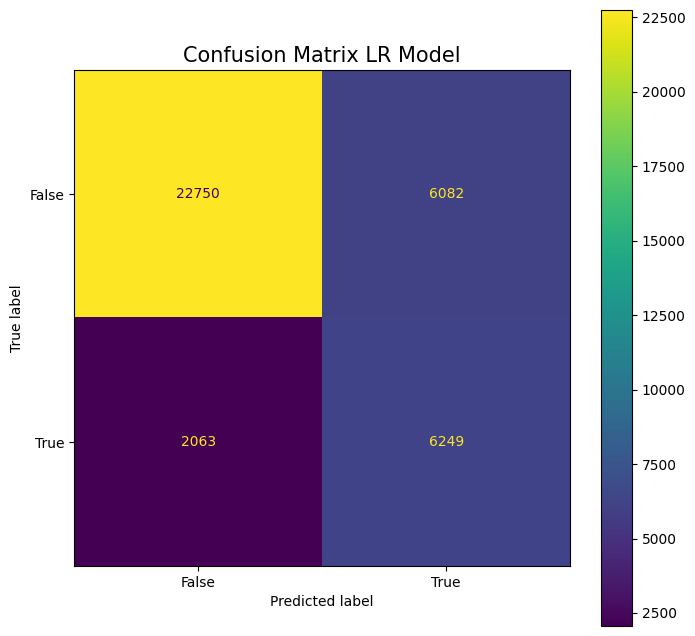

In [90]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cm_lr, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix LR Model', size=15)

plt.show()

In [92]:
print(f'Classification Report:\n{classification_report(y_df_test, y_pred_LR)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     28832
           1       0.51      0.75      0.61      8312

    accuracy                           0.78     37144
   macro avg       0.71      0.77      0.73     37144
weighted avg       0.83      0.78      0.79     37144



## 6.4 Support Vector Machine

### 6.4.1 Hyperparameter tuning & pelatihan model

In [93]:
# Membuat model Support Vector Machine
model_SVM = SVC(random_state=42)

# Melakukan fitting pada data
model_SVM.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

### 6.4.2 Evaluasi Model

In [95]:
# Prediksi model
y_pred_SVM = model_SVM.predict(X_df_test)

# Menghitung metrik presisi, recall, dan F1-score
accuracy_svm = accuracy_score(y_df_test, y_pred_SVM)
precision_svm = precision_score(y_df_test, y_pred_SVM, average='weighted')
recall_svm = recall_score(y_df_test, y_pred_SVM, average='weighted')
f1_svm = f1_score(y_df_test, y_pred_SVM, average='weighted')

print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)

SVM Accuracy: 0.7840835666594874
SVM Precision: 0.8265491686618749
SVM Recall: 0.7840835666594874
SVM F1-score: 0.7967498635874944


In [96]:
cm_svm = confusion_matrix(y_df_test, y_pred_SVM)
cm_svm

array([[22876,  5956],
       [ 2064,  6248]])

In [97]:
tn, fp, fn, tp = cm_svm.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 22876
False Positive : 5956
False Negative : 2064
True Positive  : 6248


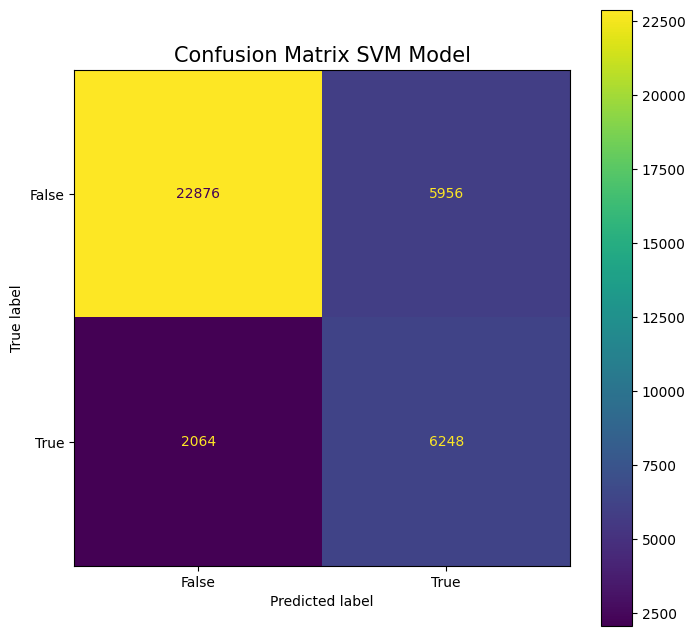

In [98]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cm_svm, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix SVM Model', size=15)

plt.show()

In [99]:
print(f'Classification Report:\n{classification_report(y_df_test, y_pred_SVM)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     28832
           1       0.51      0.75      0.61      8312

    accuracy                           0.78     37144
   macro avg       0.71      0.77      0.73     37144
weighted avg       0.83      0.78      0.80     37144



# 7. Evaluasi

In [104]:
evaluasi = {'model': ['Logistic Regression', 'SVM'],
            'data latih': [X_train.shape[0], X_train.shape[0]],
            'data uji': [X_test.shape[0], X_test.shape[0]],
            'accuracy': [accuracy_lr, accuracy_svm],
            'precision': [precision_lr, precision_svm],
            'recall': [recall_lr, recall_svm],
            'f1-score': [f1_lr, f1_svm]}

evaluasi

{'model': ['Logistic Regression', 'SVM'],
 'data latih': [94480, 94480],
 'data uji': [40492, 40492],
 'accuracy': [0.7807182855912126, 0.7840835666594874],
 'precision': [0.8250898619752302, 0.8265491686618749],
 'recall': [0.7807182855912126, 0.7840835666594874],
 'f1-score': [0.7938502176240927, 0.7967498635874944]}

In [105]:
import numpy as np

# Membulatkan semua angka dalam matriks evaluasi menjadi 2 digit dibelakang koma
for key in evaluasi:
    if key != 'model':
      evaluasi[key] = np.around(evaluasi[key], decimals=2)

# Menampilkan matriks evaluasi yang telah dibulatkan
print(evaluasi)


{'model': ['Logistic Regression', 'SVM'], 'data latih': array([94480, 94480]), 'data uji': array([40492, 40492]), 'accuracy': array([0.78, 0.78]), 'precision': array([0.83, 0.83]), 'recall': array([0.78, 0.78]), 'f1-score': array([0.79, 0.8 ])}


In [106]:
df_evaluasi = pd.DataFrame(evaluasi)
df_evaluasi

,model,data latih,data uji,accuracy,precision,recall,f1-score
0,Logistic Regression,94480,40492,0.78,0.83,0.78,0.79
1,SVM,94480,40492,0.78,0.83,0.78,0.80


Berdasarkan evaluasi model menggunakan dataset hujan di Australia, baik Logistic Regression maupun SVM menunjukkan kinerja yang serupa dengan akurasi sekitar 78%. Kedua model memiliki tingkat precision yang tinggi, sekitar 83%, menandakan kemampuan mereka dalam mengidentifikasi dengan tepat kasus positif. Recall yang sebesar 78% mengindikasikan bahwa keduanya efektif dalam menemukan sebagian besar kasus positif yang sebenarnya. F1-score, sebagai keseimbangan antara precision dan recall, memiliki nilai sekitar 0.79 untuk Logistic Regression dan 0.80 untuk SVM. Hasil ini menunjukkan bahwa keduanya dapat menjadi pilihan yang baik.